### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



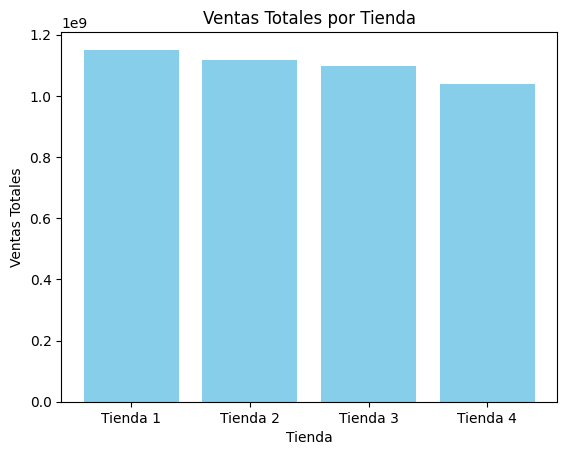

Ventas totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


In [ ]:
import matplotlib.pyplot as plt

total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
total_ventas = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]

plt.bar(tiendas, total_ventas, color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Tienda')
plt.show()
print("Ventas totales por tienda:")
print("Tienda 1:", total_tienda1)
print("Tienda 2:", total_tienda2)
print("Tienda 3:", total_tienda3)
print("Tienda 4:", total_tienda4)


# 2. Ventas por categoría

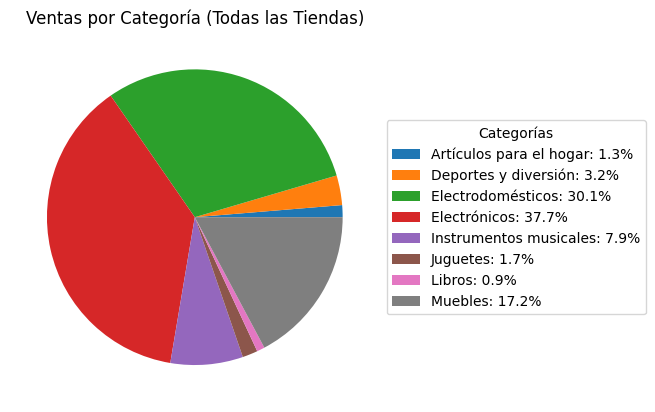

Ventas por categoría:
Categoría del Producto
Artículos para el hogar    5.757980e+07
Deportes y diversión       1.429777e+08
Electrodomésticos          1.324751e+09
Electrónicos               1.660576e+09
Instrumentos musicales     3.487726e+08
Juguetes                   7.360440e+07
Libros                     3.769610e+07
Muebles                    7.576610e+08
Name: Precio, dtype: float64


In [ ]:
total_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

venta_categoria = total_tiendas.groupby('Categoría del Producto')['Precio'].sum()

venta_total = venta_categoria.sum()
porcentaje = venta_categoria / venta_total * 100

fig, ax = plt.subplots()

wedges, _ = ax.pie(venta_categoria, startangle=0)

ax.legend(wedges, [f"{label}: {value:.1f}%" for label, value in porcentaje.items()], title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Ventas por Categoría (Todas las Tiendas)')

plt.show()

print("Ventas por categoría:")
print(venta_categoria)

# 3. Calificación promedio de la tienda


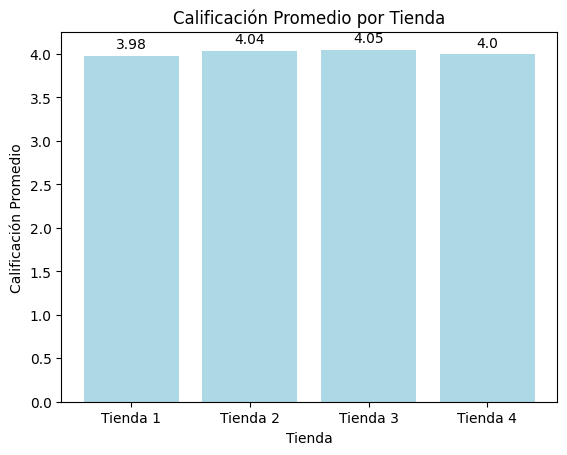

Calificación promedio por tienda:
Tienda 1: 3.976685036032217
Tienda 2: 4.037303942348453
Tienda 3: 4.048325561678677
Tienda 4: 3.9957591178965224


In [ ]:
promedio_tienda1 = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

nombre_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

bars = plt.bar(nombre_tienda, promedios, color='lightblue')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

print("Calificación promedio por tienda:")
print("Tienda 1:", promedio_tienda1)
print("Tienda 2:", promedio_tienda2)
print("Tienda 3:", promedio_tienda3)
print("Tienda 4:", promedio_tienda4)

# 4. Productos más y menos vendidos

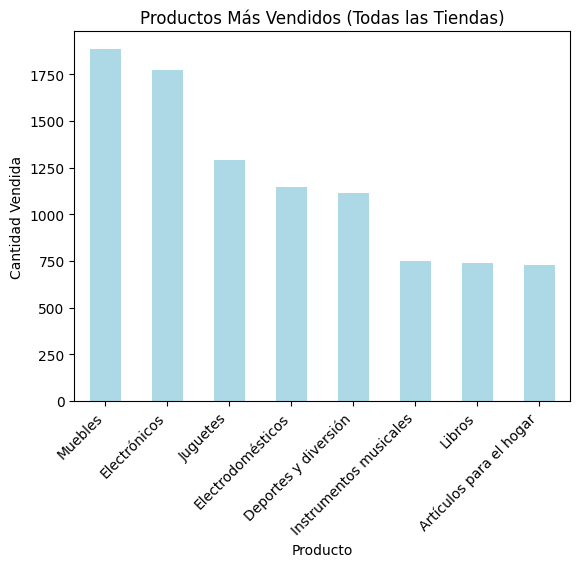

In [ ]:
producto_cuenta = total_tiendas['Categoría del Producto'].value_counts()

producto_cuenta.plot(kind='bar', color='lightblue')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Productos Más Vendidos (Todas las Tiendas)')
plt.xticks(rotation=45, ha='right')
plt.show()


# 5. Envío promedio por tienda

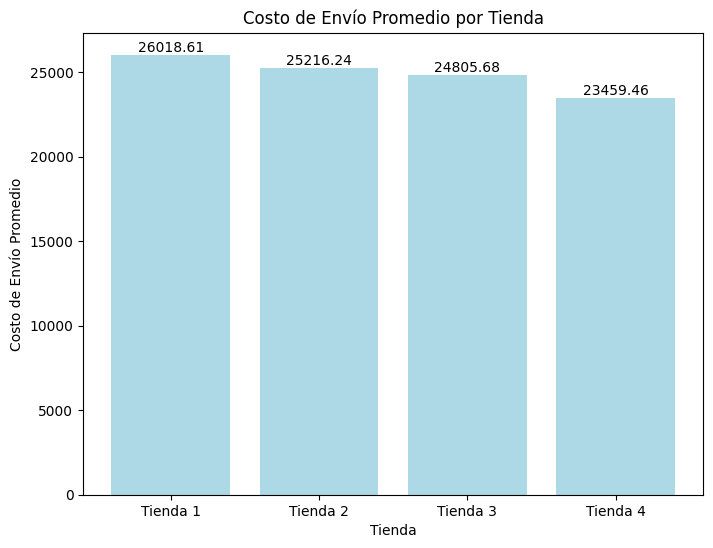

Costo de envío promedio por tienda:
Tienda 1: 26018.60958033065
Tienda 2: 25216.235693090293
Tienda 3: 24805.680373039424
Tienda 4: 23459.457167090754


In [ ]:
envio_tienda1 = tienda['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()

etiquetas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envio_data = [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]

plt.figure(figsize=(8, 6))
bars = plt.bar(etiquetas, envio_data, color='lightblue')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

print("Costo de envío promedio por tienda:")
print("Tienda 1:", envio_tienda1)
print("Tienda 2:", envio_tienda2)
print("Tienda 3:", envio_tienda3)
print("Tienda 4:", envio_tienda4)

#Informe Final: Análisis Comparativo para la Decisión de Cierre de Tienda Alura Store#

##Introducción##

El presente informe tiene como objetivo principal analizar y comparar el rendimiento de cuatro tiendas actualmente en operación para determinar cuál de ellas representa la candidata más adecuada para su cierre. Esta decisión se basará en la evaluación de diversos factores clave, incluyendo los ingresos totales generados por cada tienda, las calificaciones promedio otorgadas por los clientes, los productos específicos con mayor y menor volumen de ventas (inferido a través de las categorías), y el coste de envío promedio asociado a cada establecimiento. El análisis busca encontrar debilidades o los desafíos de cada tienda, para facilitar una toma de decisiones estratégica por parte del Sr. Juan respecto a la optimización de sus operaciones.

##Desarrollo y Análisis de Datos##

A continuación, se presentan los hallazgos clave derivados del análisis de los datos proporcionados, interpretados desde la perspectiva de identificar la tienda con el rendimiento menos favorable.

###Ingresos Totales por Tienda###

Los ingresos totales son un indicador fundamental de la viabilidad y contribución de cada tienda.

-Tienda 1: $1,150,880,400

-Tienda 2: $1,116,343,500

-Tienda 3: $1,098,019,600

-Tienda 4: $1,038,375,700 (Ingresos más bajos)

La Tienda 4 es la que genera los menores ingresos totales. Aunque la diferencia con la Tienda 3 no es drástica, sí es la que menos aporta en términos de volumen de ventas bruto. Este es un primer indicador importante al considerar un cierre.

###Calificaciones Promedio de los Clientes por Tienda###

La satisfacción del cliente puede indicar problemas operativos o de percepción que afectan el rendimiento.
Tienda 3: 4.048
Tienda 2: 4.037
Tienda 4: 3.996
Tienda 1: 3.977 (Calificación más baja)

La Tienda 1 presenta la calificación promedio de clientes más baja. Aunque la diferencia es marginal respecto a la Tienda 4.

###Coste de Envío Promedio por Tienda###

Un coste de envío elevado puede disuadir a los clientes de comprar en tiendas mas lejanas a sus domicilios o podria erosionar los márgenes si la tienda es quien ofrece envíos gratuitos.

Tienda 1: $26,018 (Coste de envío más alto)

Tienda 2: $25,216

Tienda 3: $24,805

Tienda 4: $23,459 (Coste de envío más bajo)

La Tienda 1 tiene el coste de envío promedio más alto. Esto la hace menos competitiva frente a las demás, especialmente la Tienda 4 que ofrece el más bajo.

###Productos Más y Menos Vendidos (General)###

Los productos de "Electrónicos" y "Electrodomésticos" son los más vendidos en general, mientras que "Libros" y "Artículos para el hogar" son los menos vendidos. Esta información puede ser clave para a contextualizar el rendimiento de las tiendas si su inventario se concentra en categorías con el menor nivel de interes de sus clientes.

###Debilidades Clave por Tienda (Enfoque en Cierre)###

Tienda 1:	La peor Calificación de clientes, Costes de envío más altos.	Ingresos totales más altos.

Tienda 2:	Coste de envío moderadamente alto.	Segundo ingresos más altos, buena calificación de clientes.

Tienda 3:	Terceros ingresos totales (aunque la diferencia con T2 no es muy grande).	Calificación de clientes más alta, bajo coste de envío.

Tienda 4:	La tienda con los ingresos totales más bajos.	La tienda con coste de envío promedio más bajo. La 2da calificación mas baja.

##Conclusión y Recomendación##

Tras analizar los datos desde la perspectiva de identificar la tienda con mayores debilidades o menor rendimiento general, se procede a la recomendación.

Tienda 1: A pesar de tener la calificación más baja y el coste de envío más alto es la tienda que mas ventas totales genera.

Tienda 2 y Tienda 3: Ambas muestran un rendimiento positivo en la mayoría de los indicadores (buenos ingresos, altas calificaciones, costes de envío manejables).

Tienda 4: Es la que registra los ingresos totales más bajos. Si bien tiene el coste de envío más competitivo, su calificacion regular y su menor capacidad para generar ventas la posiciona como una unidad menos productiva en términos absolutos.

###Recomendación:###

Considerando la necesidad de optimizar recursos y potencialmente cerrar una operación, se recomienda considerar el cierre de la Tienda 4.

El factor más crítico al considerar un cierre suele ser la contribución económica. La Tienda 4 es la que menos ingresos genera ($1,038,375,700). Aunque sus costes de envío son bajos y su calificación es aceptable, esto no se traduce en un volumen de ventas comparable al de las otras tiendas. Un cierre aquí implicaría la menor pérdida de ingresos brutos.

Aunque no es la peor en todos los aspectos individuales (la Tienda 1 tiene peores calificaciones y costes de envío), la combinación de ser la última en ingresos la hace la candidata principal si el objetivo es desprenderse de la unidad menos productiva en términos de ventas.